In [38]:
# Данные тут
# статья https://statmodeling.stat.columbia.edu/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/
# данные https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

In [39]:
# Скачиваем данные, проверяем их, ищем пропущенные данные

In [40]:
temp = pd.read_csv('births.csv') 
display(temp.head())
display(temp.tail())

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [41]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [42]:
temp.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [43]:
temp[temp.day==99]

,year,month,day,gender,births
62,1969,1,99.0,F,26
63,1969,1,99.0,M,38
126,1969,2,99.0,F,42
127,1969,2,99.0,M,48
190,1969,3,99.0,F,64
...,...,...,...,...,...
14572,1988,4,99.0,F,1
14635,1988,5,99.0,F,1
14696,1988,6,99.0,F,1
14697,1988,6,99.0,M,1


In [44]:
temp[temp.day.isna()]

,year,month,day,gender,births
15067,1989,1,NaN,F,156749
15068,1989,1,NaN,M,164052
15069,1989,2,NaN,F,146710
15070,1989,2,NaN,M,154047
15071,1989,3,NaN,F,165889
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [45]:
df = temp.pivot(index = ['year', 'month', 'day'], columns = 'gender', values= 'births').reset_index()
df = df.replace({'day': 99}, np.nan)
df.dropna(inplace=True)
df.day = df.day.astype(int)
df 

gender,year,month,day,F,M
0,1969,1,1,4046.0,4440.0
1,1969,1,2,4454.0,4548.0
2,1969,1,3,4548.0,4994.0
3,1969,1,4,4440.0,4520.0
4,1969,1,5,4192.0,4198.0
...,...,...,...,...,...
7562,1988,12,27,5633.0,5895.0
7563,1988,12,28,5858.0,5989.0
7564,1988,12,29,5760.0,5944.0
7565,1988,12,30,5742.0,6095.0


In [46]:
df.index = pd.PeriodIndex(year = df.year, month=df.month, day= df.day, freq='D')
df.index.name ='date'
df

gender,year,month,day,F,M
date,,,,,
1969-01-01,1969,1,1,4046.0,4440.0
1969-01-02,1969,1,2,4454.0,4548.0
1969-01-03,1969,1,3,4548.0,4994.0
1969-01-04,1969,1,4,4440.0,4520.0
1969-01-05,1969,1,5,4192.0,4198.0
...,...,...,...,...,...
1988-12-27,1988,12,27,5633.0,5895.0
1988-12-28,1988,12,28,5858.0,5989.0
1988-12-29,1988,12,29,5760.0,5944.0


In [47]:
df['sum'] = df[['F','M']].sum(axis=1)
df['dayofweek'] = df.index.dayofweek
df

gender,year,month,day,F,M,sum,dayofweek
date,,,,,,,
1969-01-01,1969,1,1,4046.0,4440.0,8486.0,2
1969-01-02,1969,1,2,4454.0,4548.0,9002.0,3
1969-01-03,1969,1,3,4548.0,4994.0,9542.0,4
1969-01-04,1969,1,4,4440.0,4520.0,8960.0,5
1969-01-05,1969,1,5,4192.0,4198.0,8390.0,6
...,...,...,...,...,...,...,...
1988-12-27,1988,12,27,5633.0,5895.0,11528.0,1
1988-12-28,1988,12,28,5858.0,5989.0,11847.0,2
1988-12-29,1988,12,29,5760.0,5944.0,11704.0,3


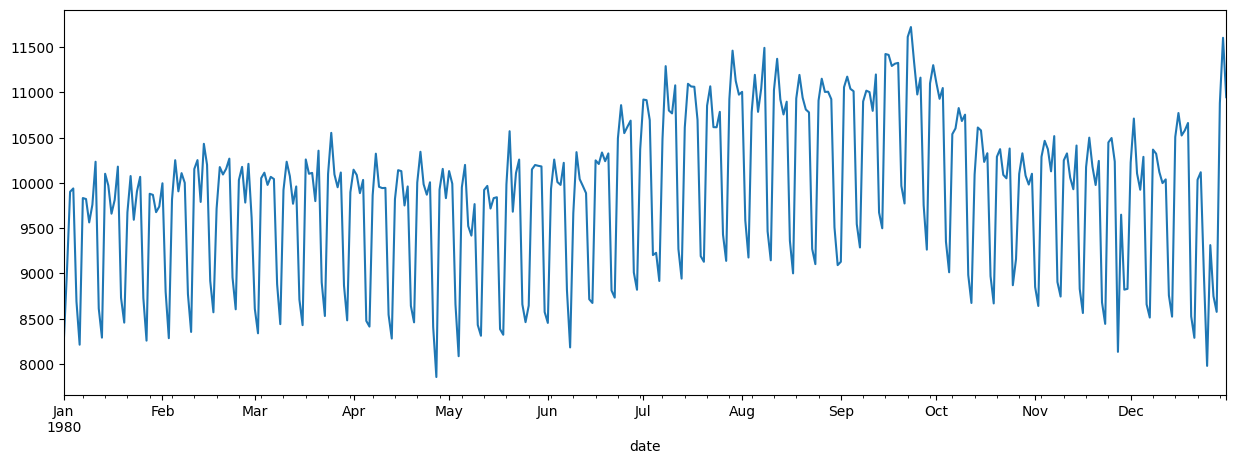

In [48]:
plt_1980 = df.loc['1980']['sum']
plt.figure(figsize=(15,5))
plt_1980.plot();

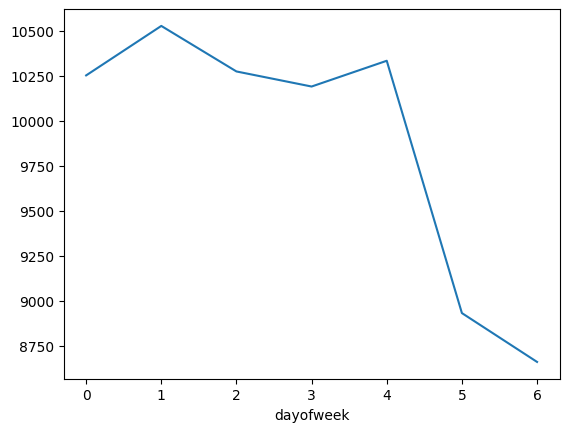

In [49]:
df.loc['1980'].groupby('dayofweek')['sum'].mean().plot();

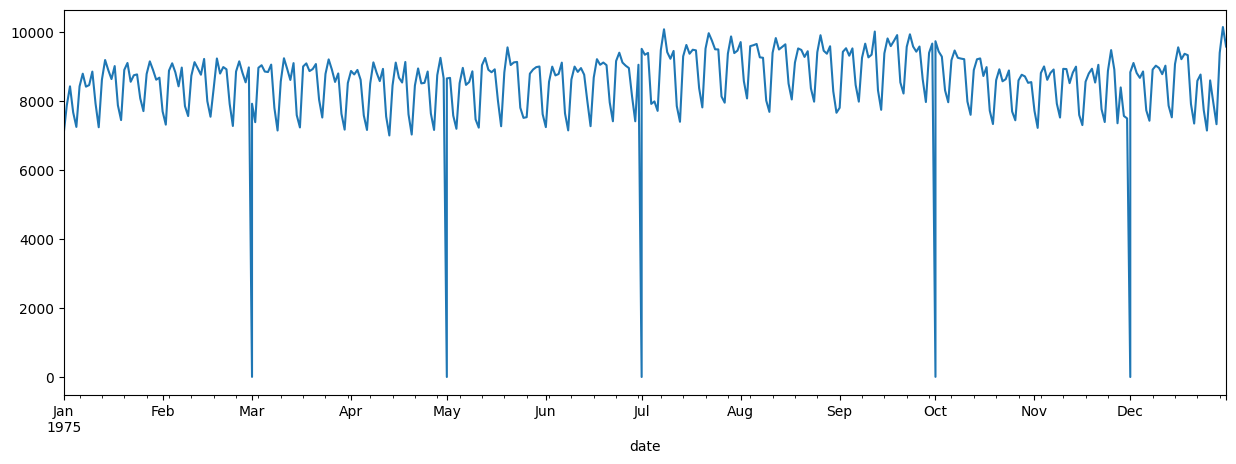

In [50]:
plt_1975 = df.loc['1975']['sum']
plt.figure(figsize=(15,5))
plt_1975.plot();

In [51]:
plt_1975.loc['1975-02-25':'1975-03-10']

date
1975-02-25    9150.0
1975-02-26    8820.0
1975-02-27    8541.0
1975-02-28    8974.0
1975-03-01       7.0
1975-03-01    7921.0
1975-03-02    7387.0
1975-03-03    8963.0
1975-03-04    9037.0
1975-03-05    8854.0
1975-03-06    8840.0
1975-03-07    9055.0
1975-03-08    7804.0
1975-03-09    7146.0
1975-03-10    8568.0
Freq: D, Name: sum, dtype: float64

In [71]:
import holidays
holidays_1980 = pd.Series(holidays.US(years = [1960,1970,1980,1990]))
holidays_1980

1960-01-01                 New Year's Day
1960-02-22          Washington's Birthday
1960-05-30                   Memorial Day
1960-07-04               Independence Day
1960-09-05                      Labor Day
1960-10-12                   Columbus Day
1960-11-11                   Veterans Day
1960-11-24                   Thanksgiving
1960-12-25                  Christmas Day
1960-12-26       Christmas Day (Observed)
1970-01-01                 New Year's Day
1970-02-22          Washington's Birthday
1970-05-30                   Memorial Day
1970-07-04               Independence Day
1970-07-03    Independence Day (Observed)
1970-09-07                      Labor Day
1970-10-12                   Columbus Day
1970-11-11                   Veterans Day
1970-11-26                   Thanksgiving
1970-12-25                  Christmas Day
1980-01-01                 New Year's Day
1980-02-18          Washington's Birthday
1980-05-26                   Memorial Day
1980-07-04               Independe

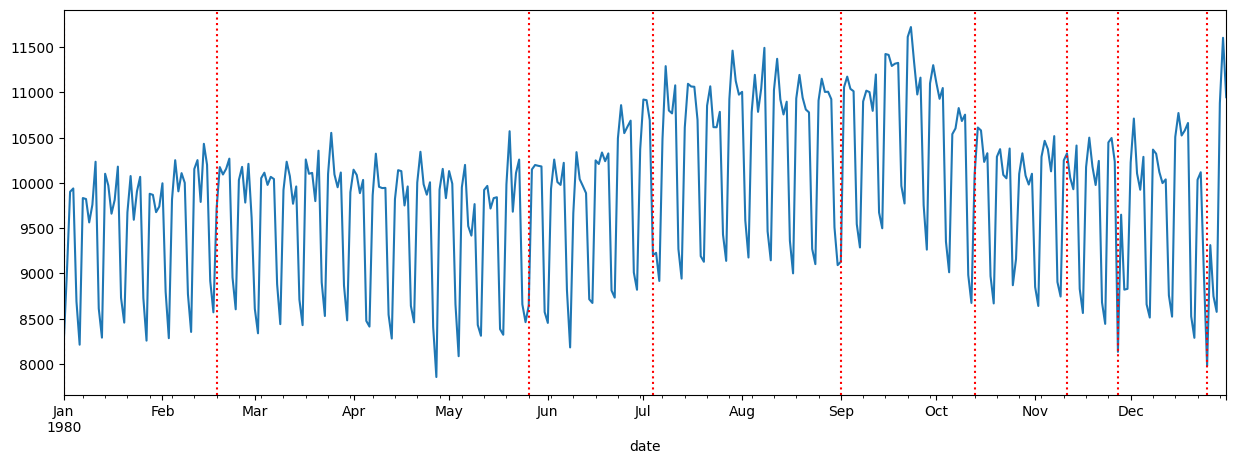

In [74]:
plt_1980 = df.loc['1980']['sum']
plt.figure(figsize=(15,5))
plt_1980.plot();
[plt.axvline(vline, color ='red', linestyle= ':') for vline in holidays_1980.index];

In [54]:
df.groupby(['month','day'])[['F','M','sum']].mean().reset_index()

gender,month,day,F,M,sum
0,1,1,3899.05,4119.40,8018.45
1,1,2,4142.05,4352.75,8494.80
2,1,3,4393.65,4608.15,9001.80
3,1,4,4449.75,4692.95,9142.70
4,1,5,4485.55,4721.70,9207.25
...,...,...,...,...,...
367,12,27,4733.95,4966.35,9700.30
368,12,28,4919.10,5169.30,10088.40
369,12,29,5015.40,5224.90,10240.30
370,12,30,5027.70,5317.00,10344.70


gender,year,month,day,F,M,sum,dayofweek
date,,,,,,,
1969-01-01,1969,1,1,4046.0,4440.0,8486.0,2
1969-01-02,1969,1,2,4454.0,4548.0,9002.0,3
1969-01-03,1969,1,3,4548.0,4994.0,9542.0,4
1969-01-04,1969,1,4,4440.0,4520.0,8960.0,5
1969-01-05,1969,1,5,4192.0,4198.0,8390.0,6
...,...,...,...,...,...,...,...
1988-12-27,1988,12,27,5633.0,5895.0,11528.0,1
1988-12-28,1988,12,28,5858.0,5989.0,11847.0,2
1988-12-29,1988,12,29,5760.0,5944.0,11704.0,3


In [63]:
### ПРОБЛЕМА 29 февраля. Среднее ОК

df_group = df.groupby(df.index.strftime('%m-%d'))[['F','M','sum']].mean()
df_group.loc['02-28':'03-02']

gender,F,M,sum
date,,,
02-28,4590.500000,4800.100000,9390.600000
02-29,4524.400000,4722.400000,9246.800000
03-01,3569.346154,3733.192308,7302.538462
03-02,4039.000000,4226.652174,8265.652174


In [65]:
### ПРОБЛЕМА 29 февраля. Сумма Fail

df_group_29 = df.groupby(df.index.strftime('%m-%d'))[['F','M','sum']].sum()
df_group_29.loc['02-28':'03-02']

gender,F,M,sum
date,,,
02-28,91810.0,96002.0,187812.0
02-29,22622.0,23612.0,46234.0
03-01,92803.0,97063.0,189866.0
03-02,92897.0,97213.0,190110.0


In [140]:
pd.date_range('2000-01-01', '2000-12-31', freq="MS").strftime('%m-%d').to_numpy()

array(['01-01', '02-01', '03-01', '04-01', '05-01', '06-01', '07-01',
       '08-01', '09-01', '10-01', '11-01', '12-01'], dtype=object)

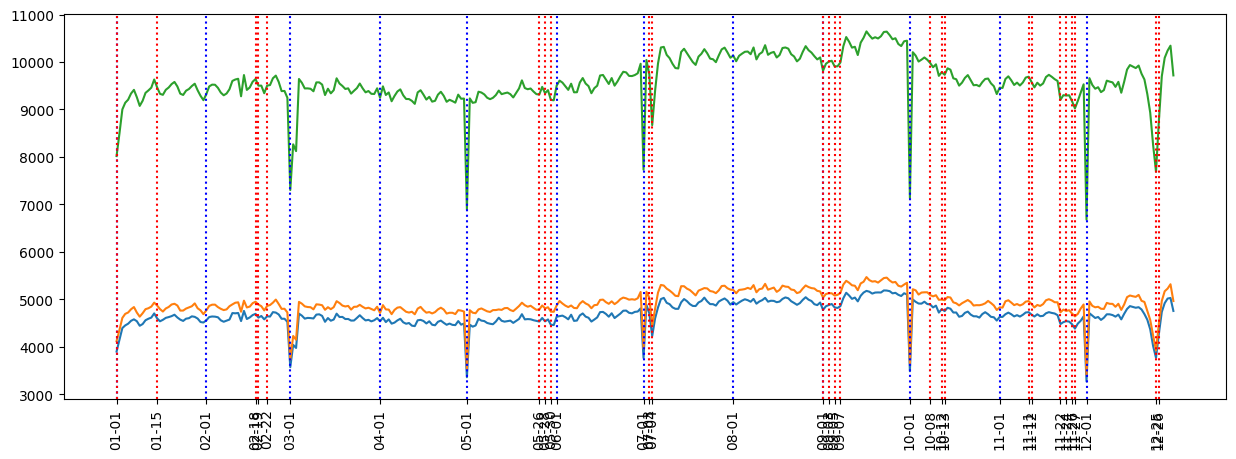

In [165]:
df_group = df.groupby(df.index.strftime('%m-%d'))[['F','M','sum']].mean()



plt.figure(figsize=(15,5))
plt.plot(df_group);

time_line = pd.to_datetime(holidays_1980.index).strftime('%m-%d').drop_duplicates().to_numpy()
time_month = pd.date_range('2000-01-01', '2000-12-31', freq="MS").strftime('%m-%d').to_numpy()


plt.xticks(np.union1d(time_month,time_line), rotation=90);
[plt.axvline(vline, color ='blue', linestyle= ':') for vline in time_month];
[plt.axvline(vline, color ='red', linestyle= ':') for vline in time_line];


In [147]:
df_group.loc['02-25':'03-04']

gender,F,M,sum
date,,,
02-25,4720.000000,4994.050000,9714.050000
02-26,4680.500000,4900.650000,9581.150000
02-27,4589.400000,4798.100000,9387.500000
02-28,4590.500000,4800.100000,9390.600000
02-29,4524.400000,4722.400000,9246.800000
03-01,3569.346154,3733.192308,7302.538462
03-02,4039.000000,4226.652174,8265.652174
03-03,3974.125000,4148.291667,8122.416667
03-04,4698.050000,4945.050000,9643.100000


In [148]:
df_group.loc['04-29':'05-04']

gender,F,M,sum
date,,,
04-29,4465.200000,4761.300000,9226.500000
04-30,4488.600000,4741.600000,9230.200000
05-01,3357.518519,3537.777778,6895.296296
05-02,4463.400000,4770.000000,9233.400000
05-03,4423.100000,4717.350000,9140.450000
05-04,4447.800000,4706.200000,9154.000000


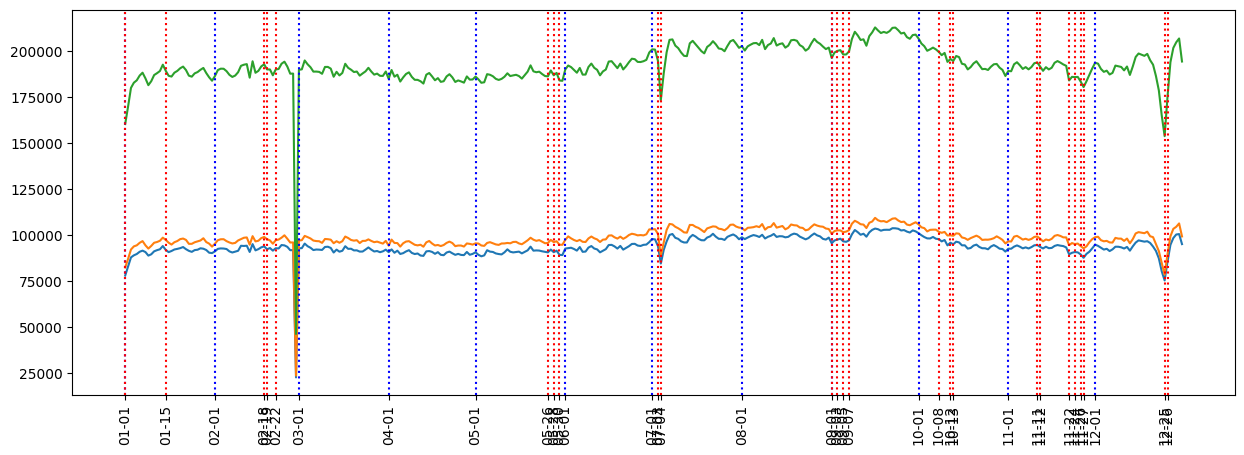

In [149]:
df_group = df.groupby(df.index.strftime('%m-%d'))[['F','M','sum']].sum()


plt.figure(figsize=(15,5))
plt.plot(df_group);

time_line = pd.to_datetime(holidays_1980.index).strftime('%m-%d').drop_duplicates().to_numpy()
time_month = pd.date_range('2000-01-01', '2000-12-31', freq="MS").strftime('%m-%d').to_numpy()


plt.xticks(np.union1d(time_month,time_line), rotation=90);
[plt.axvline(vline, color ='blue', linestyle= ':') for vline in time_month];
[plt.axvline(vline, color ='red', linestyle= ':') for vline in time_line];

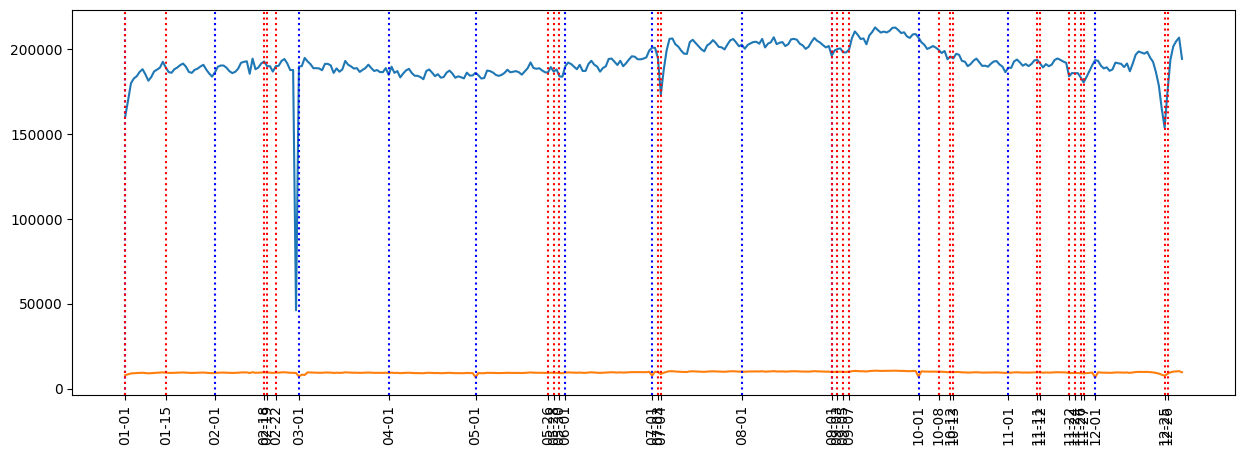

In [170]:
df_group1 = df.groupby(df.index.strftime('%m-%d'))['sum'].sum()
df_group2 = df.groupby(df.index.strftime('%m-%d'))['sum'].mean()

plt.figure(figsize=(15,5))
plt.plot(df_group1);
plt.plot(df_group2);

time_line = pd.to_datetime(holidays_1980.index).strftime('%m-%d').drop_duplicates().to_numpy()
time_month = pd.date_range('2000-01-01', '2000-12-31', freq="MS").strftime('%m-%d').to_numpy()


plt.xticks(np.union1d(time_month,time_line), rotation=90);
[plt.axvline(vline, color ='blue', linestyle= ':') for vline in time_month];
[plt.axvline(vline, color ='red', linestyle= ':') for vline in time_line];

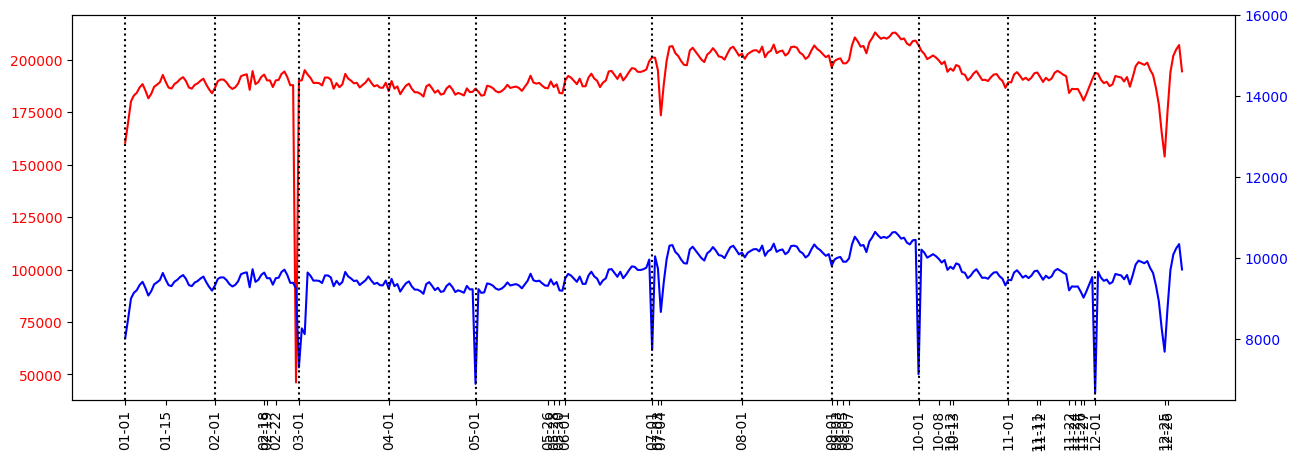

In [208]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(df_group1, color = 'red');
ax1.tick_params(axis='y', labelcolor='red')

plt.xticks(np.union1d(time_month,time_line),rotation=90);


ax2 = ax1.twinx()
ax2.plot(df_group2, color = 'blue');
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim([6500, 16000]);

# тут НЕ РАБОТАЕТ
#plt.xticks(np.union1d(time_month,time_line),rotation=90);

[plt.axvline(vline, color ='black', linestyle= ':') for vline in time_month];
#[plt.axvline(vline, color ='green', linestyle= ':') for vline in time_line];

In [150]:
df.index.is_unique

False

In [162]:
df[df.index.duplicated()].tail()

gender,year,month,day,F,M,sum,dayofweek
date,,,,,,,
1978-03-02,1978,3,2,4537.0,4783.0,9320.0,3
1978-03-03,1978,3,3,4684.0,4761.0,9445.0,4
1978-05-01,1978,5,1,4291.0,4616.0,8907.0,0
1978-10-01,1978,10,1,4214.0,4487.0,8701.0,6
1978-12-01,1978,12,1,4779.0,4835.0,9614.0,4


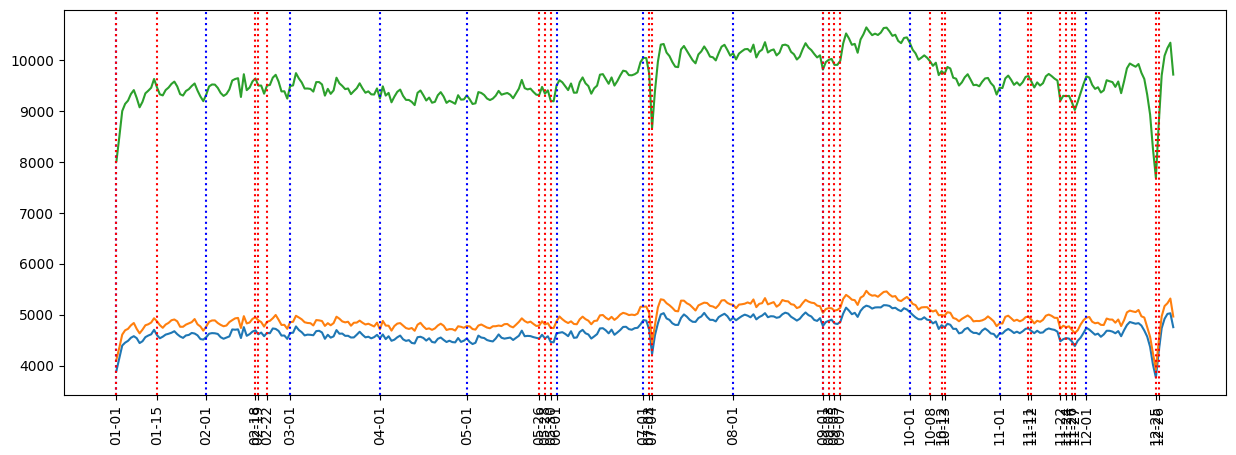

In [168]:
# Борьба за правильное СРЕДНЕЕ

df_non_dup_index = df.groupby(df.index).sum()

df_group = df_non_dup_index.groupby(df_non_dup_index.index.strftime('%m-%d'))[['F','M','sum']].mean()

plt.figure(figsize=(15,5))
plt.plot(df_group);

time_line = pd.to_datetime(holidays_1980.index).strftime('%m-%d').drop_duplicates().to_numpy()
time_month = pd.date_range('2000-01-01', '2000-12-31', freq="MS").strftime('%m-%d').to_numpy()


plt.xticks(np.union1d(time_month,time_line), rotation=90);
[plt.axvline(vline, color ='blue', linestyle= ':') for vline in time_month];
[plt.axvline(vline, color ='red', linestyle= ':') for vline in time_line];

In [20]:
import scipy as sp
p1 = sp.stats.norm.ppf(0.25)  # first quartile of standard normal distribution
p2 = sp.stats.norm.ppf(0.75)  # third quartile
print(p2 - p1)  # 1.3489795003921634

1.3489795003921634


In [21]:
sig = 1
sig/(p2-p1)

0.741301109252801

In [22]:
qunt = np.percentile(df['sum'],[25,50,75])
qunt

array([ 8776.,  9610., 10506.])

In [23]:
sig = 0.741301109252801* (qunt[2]-qunt[0])
mu = qunt[1]

In [24]:
df['Sum'] = df['sum']
df_fiter = df.query('(Sum >@mu - 5*@sig) & ( Sum<@mu + 5*@sig)')
df_fiter

gender,year,month,day,F,M,sum,dayofweek,Sum
date,,,,,,,,
1969-01-01,1969,1,1,4046.0,4440.0,8486.0,2,8486.0
1969-01-02,1969,1,2,4454.0,4548.0,9002.0,3,9002.0
1969-01-03,1969,1,3,4548.0,4994.0,9542.0,4,9542.0
1969-01-04,1969,1,4,4440.0,4520.0,8960.0,5,8960.0
1969-01-05,1969,1,5,4192.0,4198.0,8390.0,6,8390.0
...,...,...,...,...,...,...,...,...
1988-12-27,1988,12,27,5633.0,5895.0,11528.0,1,11528.0
1988-12-28,1988,12,28,5858.0,5989.0,11847.0,2,11847.0
1988-12-29,1988,12,29,5760.0,5944.0,11704.0,3,11704.0


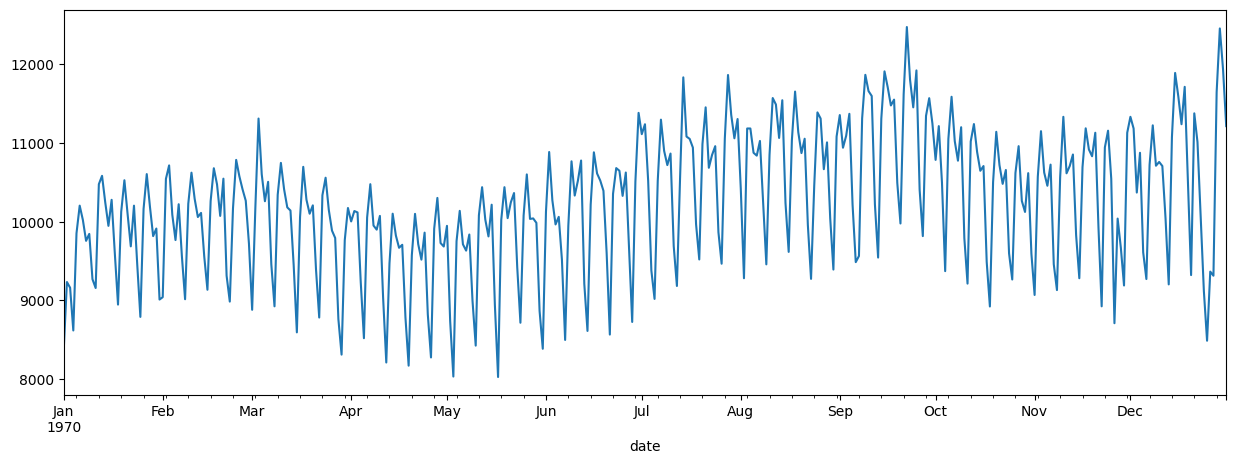

In [25]:
plt_1980 = df_fiter.loc['1970']['sum']
plt.figure(figsize=(15,5))
plt_1980.plot();
[plt.axvline(vline, color ='red', linestyle= ':') for vline in holidays_1980.index];

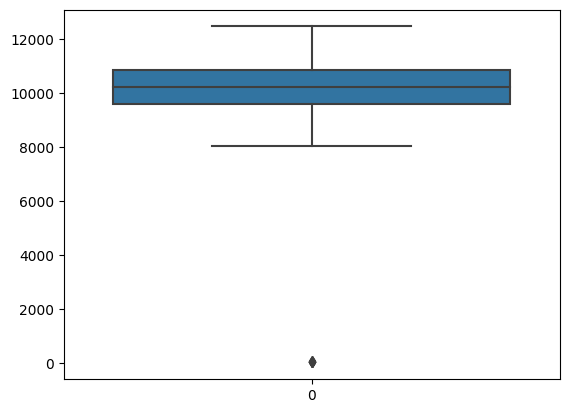

<Axes: >

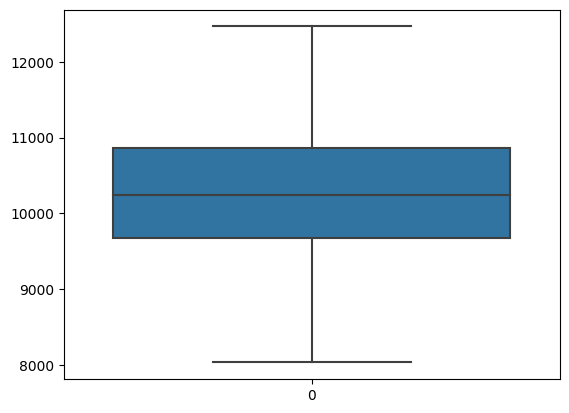

In [26]:
sns.boxplot(df.loc['1970']['sum'])
plt.show()
sns.boxplot(df_fiter.loc['1970']['sum'])

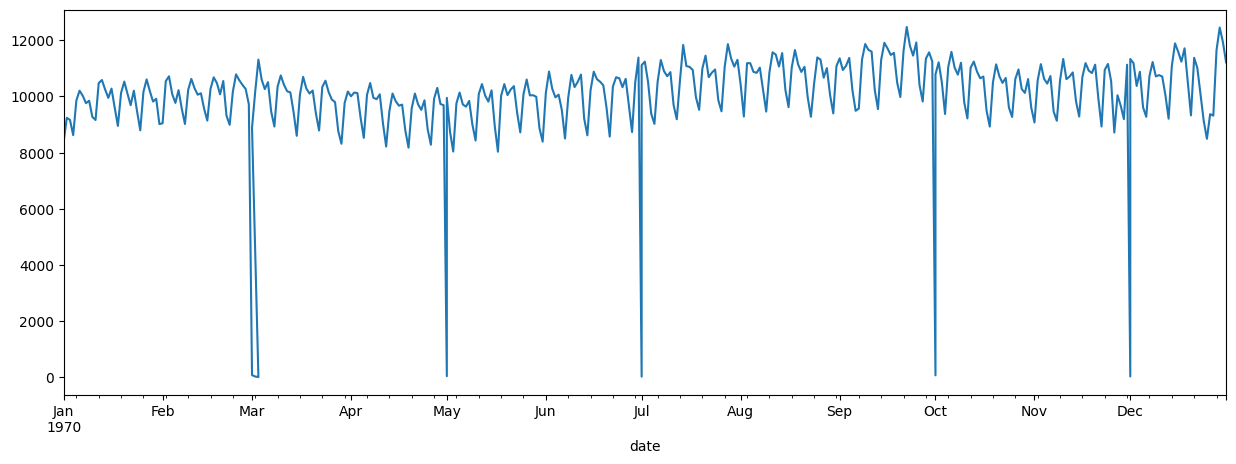

In [27]:
plt_1980 = df.loc['1970']['sum']
plt.figure(figsize=(15,5))
plt_1980.plot();
[plt.axvline(vline, color ='red', linestyle= ':') for vline in holidays_1980.index];

In [28]:
import numpy as np
from scipy.stats.mstats import winsorize

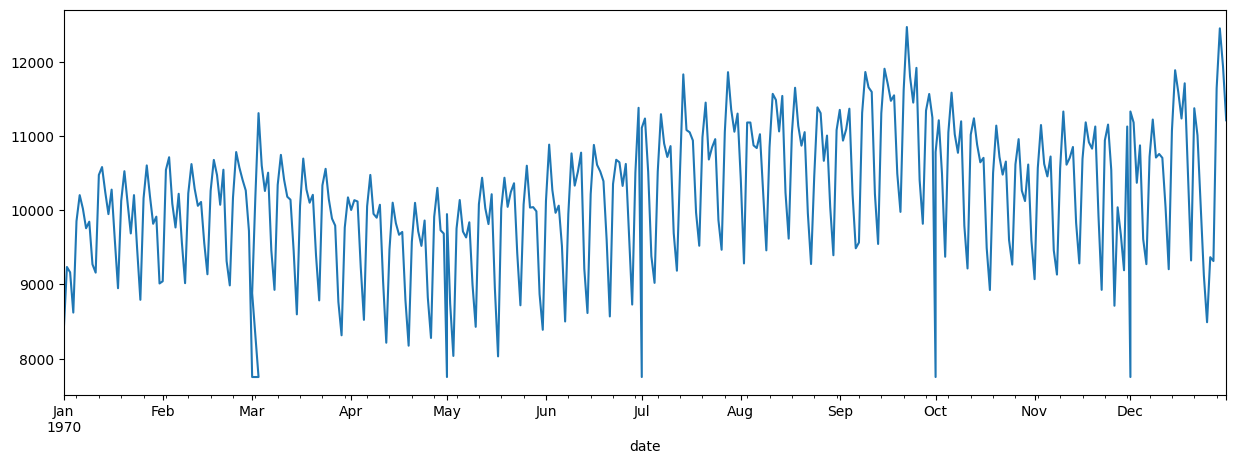

In [29]:
df['Sum'] = df['sum']
df.Sum = winsorize(df.Sum,limits=[0.05,0])

plt_1980 = df.loc['1970']['Sum']
plt.figure(figsize=(15,5))
plt_1980.plot();
[plt.axvline(vline, color ='red', linestyle= ':') for vline in holidays_1980.index];

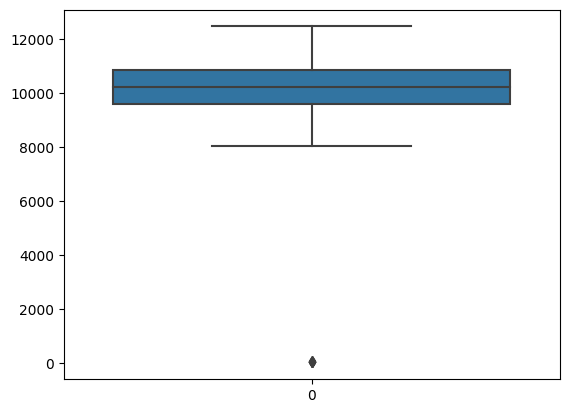

<Axes: >

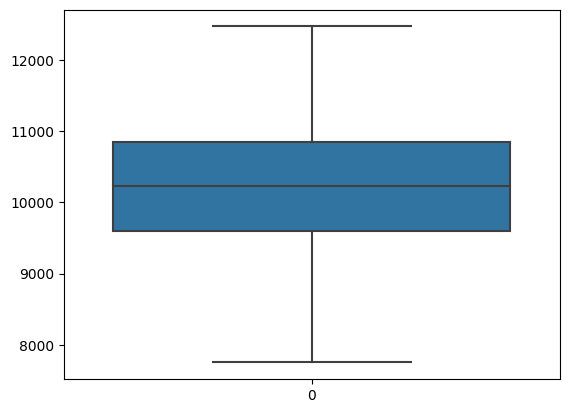

In [30]:
sns.boxplot(df.loc['1970']['sum'])
plt.show()
sns.boxplot(df.loc['1970']['Sum'])